notebook 7 
NBEATS
- wybór okna czasowego
- podzbiory kolumn
- optuna na strukturze
- sprawdzenie funkcji do metryk

In [1]:
pip install neuralforecast

INFO: pip is looking at multiple versions of neuralforecast to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/141.8 kB ? eta -:--:--
     ---------- -------------------------- 41.0/141.8 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------- 92.2/141.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 141.8/141.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---------------- ----------------------- 41.0/96.5 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/91.2 kB ? eta -:--:--
     ----------------- -------------------- 41.0/91.2 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 91.2/91.2 kB 1.3 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of neuralforecast to det

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\HP\AppData\Local\Temp\pip-install-0x6mvtf8\numba_97f8cf0429ea4203a9f1bd52484ec2ca\setup.py", line 51, in <module>
          _guard_py_ver()
        File "C:\Users\HP\AppData\Local\Temp\pip-install-0x6mvtf8\numba_97f8cf0429ea4203a9f1bd52484ec2ca\setup.py", line 48, in _guard_py_ver
          raise RuntimeError(msg.format(cur_py, min_py, max_py))
      RuntimeError: Cannot install on Python version 3.12.0; only versions >=3.8,<3.12 are supported.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()

# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [5]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
from scripts.train_utilities import *

In [1]:
import pandas as pd

prefix = "NFLX"

df_with_weekends = pd.read_csv("csv/"+prefix+'_with_weekends.csv')
df_without_weekends = pd.read_csv("csv/"+prefix+'_without_weekends.csv')

In [45]:
df_with_weekends.drop(columns=['NFLX_Open', 'NFLX_High', 'NFLX_Low', 'NFLX_Close', 'Unnamed: 0', '^GSPC_Close','vwap_14'], inplace=True) 

In [46]:
df_with_weekends['target_1'] = df_with_weekends['log_return_1'].shift(-1)
df_with_weekends['target_5'] = df_with_weekends['log_return_5'].shift(-5)
df_with_weekends['target_10'] = df_with_weekends['log_return_10'].shift(-10)
df_with_weekends['target_20'] = df_with_weekends['log_return_20'].shift(-20)

In [134]:
train_set, val_set, test_set = split_data(df_without_weekends, 'Date', '2023-01-01', '2023-03-01', start_date_train = '2021-01-01')
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(730, 50)
(59, 50)
(55, 50)


In [11]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Volume',
       'EURUSD=X_Close', 'NFLX_Volume', 'mean_future', 'mean_influential',
       'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14',
       'norm_slowk_14', 'norm_roc_14', 'log_return_1', 'log_return_5',
       'log_return_10', 'log_return_20', 'log_return_gspc_1',
       'log_return_gspc_5', 'log_return_gspc_10', 'log_return_gspc_20',
       'daily_variation', 'high_close_pressure', 'low_open_pressure',
       'low_norm', 'close_norm', 'high_norm', 'open_norm', 'target_1',
       'target_5', 'target_10', 'target_20'],
      dtype='object')

In [135]:
train_set = train_set[['Date', 'log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14', 'target_1']]
val_set = val_set[['Date','log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14', 'target_1']]
test_set = test_set[['Date','log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14', 'target_1']]
train_set.rename(columns={'Date':'ds', 'target_1':'y'}, inplace=True)
val_set.rename(columns={'Date':'ds', 'target_1':'y'}, inplace=True)
test_set.rename(columns={'Date':'ds', 'target_1':'y'}, inplace=True)
train_set['unique_id'] = 'NFLX'
val_set['unique_id'] = 'NFLX'
test_set['unique_id'] = 'NFLX'

In [136]:
val_set.tail()

,ds,log_return_1,mean_future,mean_influential,mean_trustworthy,mean_clickbait,log_return_gspc_1,norm_rsi_14,norm_slowk_14,norm_roc_14,y,unique_id
784,2023-02-24,0.000000,0.074717,0.304888,0.275707,0.082836,0.000000,0.577912,0.881310,0.038187,0.019808,NFLX
785,2023-02-25,0.019808,0.086859,0.232262,0.222720,0.049219,-0.004203,0.617332,0.913743,0.079986,-0.006529,NFLX
786,2023-02-26,-0.006529,0.138287,0.405005,0.384895,0.126674,-0.006996,0.597395,0.860940,0.106104,-0.005895,NFLX
787,2023-02-27,-0.005895,0.057587,0.125473,0.104018,0.036830,-0.003216,0.579317,0.808897,0.095444,-0.000768,NFLX
788,2023-02-28,-0.000768,0.056839,0.190404,0.187410,0.041343,0.001426,0.576877,0.774746,0.084523,0.005765,NFLX


In [40]:
# if there is not row with a date then copy row from previous day with this date  
train_set = train_set.set_index('ds').resample('D').ffill().reset_index()
val_set = val_set.set_index('ds').resample('D').ffill().reset_index()
test_set = test_set.set_index('ds').resample('D').ffill().reset_index()


In [137]:
# make ds as timestamp
train_set['ds'] = pd.to_datetime(train_set['ds'])
val_set['ds'] = pd.to_datetime(val_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

In [79]:
study.best_params

{'input_size': 6,
 'n_blocks_season': 2,
 'n_blocks_trend': 3,
 'n_blocks_ident': 2,
 'mlp_units': 64,
 'num_hidden': 3,
 'n_harmonics': 2,
 'n_polynomials': 4,
 'scaler_type': 'standard',
 'learning_rate': 0.0009164455243785934}

In [230]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS 
from neuralforecast.losses.pytorch import DistributionLoss, MQLoss
h = val_set['ds'].nunique()
# models = [NBEATS(h=h,input_size=2,
#                  loss=DistributionLoss(distribution='Normal', level=[90]),
#                  max_steps=100,
#                  scaler_type='standard',
#                 futr_exog_list=['mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14'])]
n_blocks = [prms['n_blocks_season'], prms['n_blocks_trend'], prms['n_blocks_ident']]
mlp_units=[[prms['mlp_units'], prms['mlp_units']]*prms['num_hidden']]
models = [NBEATS(
                 h=h,
                 loss=DistributionLoss(distribution='Normal', level=[90]),
                 max_steps=100,
                 futr_exog_list=['log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14'],
                 input_size=prms['input_size'],
                 stack_types=['seasonality', 'trend', 'identity'],
                 mlp_units=mlp_units,
                 n_blocks=n_blocks,
                 learning_rate=prms['learning_rate'],
                 n_harmonics=prms['n_harmonics'],
                 n_polynomials=prms['n_polynomials'],
                 scaler_type='standard',
                random_seed=1
                 )]
model = NeuralForecast(models=models, freq='D')
model.fit(train_set)

p =  model.predict(futr_df=val_set).reset_index()
#p = p.merge(val_set[['ds','unique_id', 'y']], on=['ds', 'unique_id'], how='left')
# p = p.merge(val_set[['Date', 'target_1']], on=['Date'], how='left')
p = p.merge(val_set[['ds','unique_id', 'y']].reset_index(), on=['ds', 'unique_id'], how='left')
loss = count_signs_matrix(p['y'], p['NBEATS']) 
loss = loss[1][1]/(loss[1][0]+loss[1][1])
loss

Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


0.038461538461538464

In [219]:
study.best_trial.params

{'input_size': 1,
 'n_blocks_season': 2,
 'n_blocks_trend': 2,
 'n_blocks_ident': 2,
 'mlp_units': 128,
 'num_hidden': 1,
 'n_harmonics': 3,
 'n_polynomials': 2,
 'scaler_type': 'standard',
 'learning_rate': 0.0027906075985262703}

In [150]:
mean_squared_error(p['y'], p['NBEATS'])

0.0005643292272526135

In [176]:
h

59

In [214]:
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    input_size = trial.suggest_int('input_size', 1, 6)
    
    n_blocks_season = trial.suggest_int('n_blocks_season', 1, 3)
    n_blocks_trend = trial.suggest_int('n_blocks_trend', 1, 3)
    n_blocks_identity = trial.suggest_int('n_blocks_ident', 1, 3)
    
    mlp_units_n = trial.suggest_categorical('mlp_units', [32, 64, 128])
    num_hidden = trial.suggest_int('num_hidden', 1, 3)
    
    n_harmonics = trial.suggest_int('n_harmonics', 1, 5)
    n_polynomials = trial.suggest_int('n_polynomials', 1, 5)
    
    scaler_type = trial.suggest_categorical('scaler_type', ['standard'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    
    
    n_blocks = [n_blocks_season, n_blocks_trend, n_blocks_identity]
    mlp_units=[[mlp_units_n, mlp_units_n]]*num_hidden
    h = val_set['ds'].nunique()
    models = [NBEATS(h=h,input_size=input_size,
                 loss=DistributionLoss(distribution='Normal', level=[90]),
                 max_steps=1000,
                 futr_exog_list=['log_return_1','mean_future', 'mean_influential','mean_trustworthy', 'mean_clickbait', 'log_return_gspc_1', 'norm_rsi_14', 'norm_slowk_14', 'norm_roc_14'],
                 stack_types=['seasonality', 'trend', 'identity'],
                 mlp_units=mlp_units,
                 n_blocks=n_blocks,
                 learning_rate=learning_rate,
                 n_harmonics=n_harmonics,
                 n_polynomials=n_polynomials,
                 scaler_type=scaler_type)
                 ]
    model = NeuralForecast(models=models, freq='D')
    model.fit(train_set)
    p = model.predict(futr_df=val_set).reset_index()
    p = p.merge(val_set[['ds', 'unique_id', 'y']], on=['ds', 'unique_id'], how='left')
    loss = count_signs_matrix(p['y'], p['NBEATS']) 
    loss = loss[1][1]/(loss[1][0]+loss[1][1])
    # loss = mean_squared_error(p['y'], p['NBEATS'])

    return loss

In [215]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

[I 2023-12-15 19:53:45,776] A new study created in memory with name: no-name-c2f6ac2f-b237-417b-bdd2-228e57d3db9c
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 44.70it/s]

[I 2023-12-15 19:55:37,754] Trial 0 finished with value: 0.23076923076923078 and parameters: {'input_size': 1, 'n_blocks_season': 3, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 128, 'num_hidden': 3, 'n_harmonics': 2, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.0018224348752240212}. Best is trial 0 with value: 0.23076923076923078.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.36it/s]


[I 2023-12-15 19:57:04,337] Trial 1 finished with value: 0.5 and parameters: {'input_size': 2, 'n_blocks_season': 3, 'n_blocks_trend': 3, 'n_blocks_ident': 3, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 1, 'n_polynomials': 1, 'scaler_type': 'standard', 'learning_rate': 9.100866201018801e-05}. Best is trial 1 with value: 0.5.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 80.98it/s]


[I 2023-12-15 19:58:34,457] Trial 2 finished with value: 0.038461538461538464 and parameters: {'input_size': 5, 'n_blocks_season': 2, 'n_blocks_trend': 3, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 2, 'n_harmonics': 1, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.00037754651485030695}. Best is trial 1 with value: 0.5.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 57.15it/s]


[I 2023-12-15 20:00:07,320] Trial 3 finished with value: 0.6538461538461539 and parameters: {'input_size': 4, 'n_blocks_season': 2, 'n_blocks_trend': 1, 'n_blocks_ident': 3, 'mlp_units': 64, 'num_hidden': 3, 'n_harmonics': 2, 'n_polynomials': 4, 'scaler_type': 'standard', 'learning_rate': 6.347568649856103e-05}. Best is trial 3 with value: 0.6538461538461539.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 45.90it/s]

[I 2023-12-15 20:02:08,372] Trial 4 finished with value: 0.5 and parameters: {'input_size': 2, 'n_blocks_season': 3, 'n_blocks_trend': 2, 'n_blocks_ident': 3, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 3, 'n_polynomials': 1, 'scaler_type': 'standard', 'learning_rate': 0.015457594723471803}. Best is trial 3 with value: 0.6538461538461539.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 35.22it/s]

[I 2023-12-15 20:03:36,134] Trial 5 finished with value: 0.5 and parameters: {'input_size': 3, 'n_blocks_season': 3, 'n_blocks_trend': 1, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 1, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.016752815803282823}. Best is trial 3 with value: 0.6538461538461539.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 38.35it/s]

[I 2023-12-15 20:05:05,523] Trial 6 finished with value: 0.07692307692307693 and parameters: {'input_size': 5, 'n_blocks_season': 1, 'n_blocks_trend': 3, 'n_blocks_ident': 3, 'mlp_units': 32, 'num_hidden': 3, 'n_harmonics': 3, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 4.075053763785384e-05}. Best is trial 3 with value: 0.6538461538461539.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 35.48it/s]


[I 2023-12-15 20:06:45,030] Trial 7 finished with value: 1.0 and parameters: {'input_size': 1, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 3, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.0027906075985262703}. Best is trial 7 with value: 1.0.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.45it/s]

[I 2023-12-15 20:08:17,806] Trial 8 finished with value: 0.23076923076923078 and parameters: {'input_size': 2, 'n_blocks_season': 3, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 128, 'num_hidden': 1, 'n_harmonics': 2, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 1.4021518125086367e-05}. Best is trial 7 with value: 1.0.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.98it/s]_step=0.104, train_loss_epoch=0.104]              


[I 2023-12-15 20:08:45,778] Trial 9 finished with value: 0.34615384615384615 and parameters: {'input_size': 2, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 1, 'mlp_units': 64, 'num_hidden': 2, 'n_harmonics': 3, 'n_polynomials': 3, 'scaler_type': 'standard', 'learning_rate': 0.0004919778755160735}. Best is trial 7 with value: 1.0.
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 54.52it/s]_step=4.600, train_loss_epoch=4.600]           

[I 2023-12-15 20:09:09,446] Trial 10 finished with value: 1.0 and parameters: {'input_size': 6, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 5, 'n_polynomials': 5, 'scaler_type': 'standard', 'learning_rate': 0.06614876804105344}. Best is trial 7 with value: 1.0.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 45.71it/s]_step=4.590, train_loss_epoch=4.590]            

[I 2023-12-15 20:10:09,108] Trial 11 finished with value: 0.6153846153846154 and parameters: {'input_size': 6, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 5, 'n_polynomials': 5, 'scaler_type': 'standard', 'learning_rate': 0.08760874571494572}. Best is trial 7 with value: 1.0.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]_step=-2.22, train_loss_epoch=-2.22]        

[I 2023-12-15 20:10:58,023] Trial 12 finished with value: 0.2692307692307692 and parameters: {'input_size': 6, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 5, 'n_polynomials': 5, 'scaler_type': 'standard', 'learning_rate': 0.004412107092660275}. Best is trial 7 with value: 1.0.


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 34.99it/s]_step=7.35e+3, train_loss_epoch=7.35e+3]        

[I 2023-12-15 20:11:13,459] Trial 13 finished with value: 0.5384615384615384 and parameters: {'input_size': 4, 'n_blocks_season': 1, 'n_blocks_trend': 1, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 1, 'n_harmonics': 4, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.05891590234938065}. Best is trial 7 with value: 1.0.
Seed set to 1



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.46it/s]_step=-.657, train_loss_epoch=-.657]         

[I 2023-12-15 20:11:28,496] Trial 14 finished with value: 0.6923076923076923 and parameters: {'input_size': 1, 'n_blocks_season': 2, 'n_blocks_trend': 2, 'n_blocks_ident': 2, 'mlp_units': 32, 'num_hidden': 2, 'n_harmonics': 4, 'n_polynomials': 2, 'scaler_type': 'standard', 'learning_rate': 0.006252015298012767}. Best is trial 7 with value: 1.0.


In [229]:
prms = study.get_trials()[10].params

In [57]:
val_set.head()

,ds,mean_future,mean_influential,mean_trustworthy,mean_clickbait,log_return_gspc_1,norm_rsi_14,norm_slowk_14,norm_roc_14,y,unique_id
1033,2023-07-01,0.121962,0.479170,0.464013,0.227652,0.00000,0.678372,0.805054,0.019747,0.000000,NFLX
1034,2023-07-02,0.191431,0.457522,0.426086,0.187946,0.00000,0.678372,0.805054,0.019747,0.002154,NFLX
1035,2023-07-03,0.197864,0.503323,0.430169,0.164357,0.00117,0.683970,0.917842,0.021947,0.000000,NFLX
1036,2023-07-04,-0.056240,-0.066822,-0.006749,-0.026588,0.00000,0.683970,0.917842,0.015505,0.010053,NFLX
1037,2023-07-05,0.112205,0.263429,0.224886,0.101679,-0.00197,0.711326,0.871548,0.050536,-0.015960,NFLX


In [165]:
test_set['ds']

789   2023-03-01
790   2023-03-02
791   2023-03-03
792   2023-03-04
793   2023-03-05
794   2023-03-06
795   2023-03-07
796   2023-03-08
797   2023-03-09
798   2023-03-10
799   2023-03-11
800   2023-03-12
801   2023-03-13
802   2023-03-14
803   2023-03-15
804   2023-03-16
805   2023-03-17
806   2023-03-18
807   2023-03-19
808   2023-03-20
809   2023-03-21
810   2023-03-22
811   2023-03-23
812   2023-03-24
813   2023-03-25
814   2023-03-26
815   2023-03-27
816   2023-03-28
817   2023-03-29
818   2023-03-30
819   2023-03-31
820   2023-04-01
821   2023-04-02
822   2023-04-03
823   2023-04-04
824   2023-04-05
825   2023-04-06
826   2023-04-07
827   2023-04-08
828   2023-04-09
829   2023-04-10
830   2023-04-11
831   2023-04-12
832   2023-04-13
833   2023-04-14
834   2023-04-15
835   2023-04-16
836   2023-04-17
837   2023-04-18
838   2023-04-19
839   2023-04-20
840   2023-04-21
841   2023-04-22
842   2023-04-23
843   2023-04-24
Name: ds, dtype: datetime64[ns]

In [187]:
model.predict(futr_df=val_set).reset_index()

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 180.12it/s]


,unique_id,ds,NBEATS
0,NFLX,2023-01-01,-0.006884
1,NFLX,2023-01-02,-0.010781


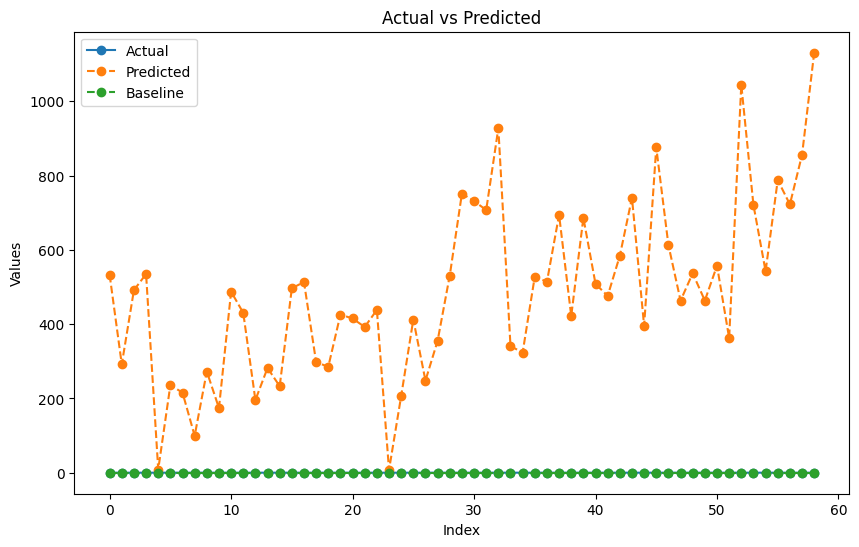

In [220]:
plot_actual_vs_predicted(p['y'], p['NBEATS'], [0 for i in range(len(val_set))])

In [213]:
count_signs_matrix(p['y'], p['NBEATS'])

array([[15, 16],
       [ 9, 17]])

In [202]:
count_signs_matrix(p['y'][:-1],p['y'].shift(-1)[:(len(p['y'])-1)])


array([[14, 14],
       [15, 11]])

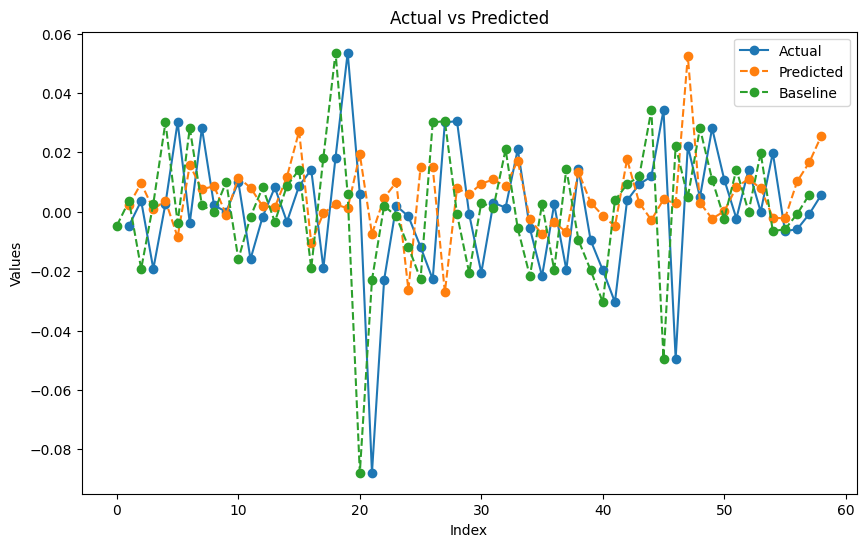

In [153]:
plot_actual_vs_predicted(p['y'][1:], p['NBEATS'][1:], p['y'].shift(-1))

In [125]:
df_without_weekends = pd.read_csv("csv/"+prefix+'_without_weekends.csv')

In [127]:
df_without_weekends.drop(columns=['NFLX_Open', 'NFLX_High', 'NFLX_Low', 'NFLX_Close', 'Unnamed: 0', '^GSPC_Close','vwap_14'], inplace=True) 

In [128]:
df_without_weekends['target_1'] = df_without_weekends['log_return_1'].shift(-1)
df_without_weekends['target_5'] = df_without_weekends['log_return_5'].shift(-5)
df_without_weekends['target_10'] = df_without_weekends['log_return_10'].shift(-10)
df_without_weekends['target_20'] = df_without_weekends['log_return_20'].shift(-20)

In [131]:
# Add column date_generated with dates from 2021-01-01 incremented by 1 day
df_without_weekends['Date'] = pd.date_range(start='2021-01-01', end='2023-09-01', freq='D')[:len(df_without_weekends)]